https://dacon.io/competitions/official/235689/data

# 월간 데이콘 운동 동작 분류 AI 경진대회

1.배경
안녕하세요 여러분!🙌 운동 동작 분류 AI 경진대회에 오신 것을 환영합니다.

운동 동작 인식 알고리즘 개발하고자 합니다.

스마트 헬스케어 산업에 적용 가능한 데이터 분석 방법을 제시해 주세요! 

2.목적
3축 가속도계(accelerometer)와 3축 자이로스코프(gyroscope)를 활용해 측정된 센서 데이터에 머신러닝 알고리즘을 적용해 운동 동작 인식 알고리즘 개발

[데이터]

3축 가속도계(accelerometer)와 3축 자이로스코프(gyroscope)를 활용해 측정된 센서 데이터

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.options.display.max_columns=50

## Load Data

In [57]:
base_path = "/content/drive/MyDrive/data/exercise"

train = pd.read_csv(f'{base_path}/train_features.csv')
train_labels = pd.read_csv(f'{base_path}/train_labels.csv')
test = pd.read_csv(f'{base_path}/test_features.csv')
submission = pd.read_csv(f'{base_path}/sample_submission.csv')

train.shape, train_labels.shape, test.shape, submission.shape

((1875000, 8), (3125, 3), (469200, 8), (782, 62))

In [42]:
train.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234


In [43]:
train_labels.head()

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise


In [44]:
test.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,3125,0,-0.628100,-0.160155,0.151487,49.665357,88.435961,13.597668
1,3125,1,-0.462548,0.012462,-0.053726,56.953059,96.185341,16.278458
2,3125,2,-0.363481,-0.091789,-0.130004,29.557396,93.836453,13.329043
3,3125,3,-0.351750,-0.239870,-0.193053,23.686172,88.608721,13.449771
4,3125,4,-0.312934,-0.123762,-0.318621,20.410071,85.327707,13.884912


In [45]:
submission.head()

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
df = pd.merge(train, train_labels).drop(columns='label_desc')
print(df.shape)
df.head()

(1875000, 12)


,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,acc_Energy,gy_Energy,gy_acc_Energy,label
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,1.146962,12.465436,12.427938,37
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,1.200703,12.913284,12.865692,37
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,1.217403,13.725729,13.692643,37
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,1.209981,15.374021,15.314907,37
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,1.211254,16.074363,16.017964,37


## EDA

In [47]:
train.describe()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
count,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06
mean,1.562000e+03,2.995000e+02,-4.489683e-01,-1.617913e-01,5.571471e-02,-1.307982e+00,-4.337745e-01,8.864100e-01
std,9.021100e+02,1.732049e+02,7.173082e-01,5.872018e-01,4.724824e-01,6.083228e+01,7.329832e+01,7.063345e+01
min,0.000000e+00,0.000000e+00,-8.838427e+00,-9.299714e+00,-8.316425e+00,-1.811127e+03,-1.594256e+03,-1.346143e+03
25%,7.810000e+02,1.497500e+02,-9.625643e-01,-5.163020e-01,-2.123550e-01,-2.048984e+01,-1.865320e+01,-1.546226e+01
50%,1.562000e+03,2.995000e+02,-6.560482e-01,-2.033985e-01,3.031258e-02,-1.421819e+00,-2.642753e-01,-1.798643e-01
75%,2.343000e+03,4.492500e+02,-1.701162e-04,1.406493e-01,3.581982e-01,1.572245e+01,1.676328e+01,1.641878e+01
max,3.124000e+03,5.990000e+02,8.426799e+00,8.484622e+00,6.432668e+00,1.870256e+03,2.111657e+03,1.255849e+03


In [48]:
train_labels.describe()

,id,label
count,3125.000000,3125.000000
mean,1562.000000,27.926720
std,902.254122,12.887405
min,0.000000,0.000000
25%,781.000000,26.000000
50%,1562.000000,26.000000
75%,2343.000000,30.000000
max,3124.000000,60.000000


In [49]:
test.describe()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
count,469200.000000,469200.000000,469200.000000,469200.000000,469200.000000,469200.000000,469200.000000,469200.000000
mean,3515.500000,299.500000,-0.450305,-0.188638,0.047377,-1.368040,-0.886681,0.524323
std,225.744011,173.205025,0.719705,0.572534,0.473548,63.273916,72.960652,70.565590
min,3125.000000,0.000000,-8.339774,-8.016826,-7.167801,-1148.067436,-1328.322686,-1288.723399
25%,3320.000000,149.750000,-0.966716,-0.533114,-0.212799,-20.988234,-19.548521,-15.295959
50%,3515.500000,299.500000,-0.659828,-0.227487,0.011947,-1.407126,-0.221448,-0.422151
75%,3711.000000,449.250000,-0.005081,0.117209,0.347686,15.552447,16.800463,15.370501
max,3906.000000,599.000000,8.173537,6.398895,7.517018,1260.580296,1761.286813,1066.225136


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875000 entries, 0 to 1874999
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      int64  
 1   time    int64  
 2   acc_x   float64
 3   acc_y   float64
 4   acc_z   float64
 5   gy_x    float64
 6   gy_y    float64
 7   gy_z    float64
dtypes: float64(6), int64(2)
memory usage: 114.4 MB


In [51]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125 entries, 0 to 3124
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          3125 non-null   int64 
 1   label       3125 non-null   int64 
 2   label_desc  3125 non-null   object
dtypes: int64(2), object(1)
memory usage: 73.4+ KB


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469200 entries, 0 to 469199
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      469200 non-null  int64  
 1   time    469200 non-null  int64  
 2   acc_x   469200 non-null  float64
 3   acc_y   469200 non-null  float64
 4   acc_z   469200 non-null  float64
 5   gy_x    469200 non-null  float64
 6   gy_y    469200 non-null  float64
 7   gy_z    469200 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 28.6 MB


In [56]:
print(train.isnull().sum().sum())
print(train_labels.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0
0


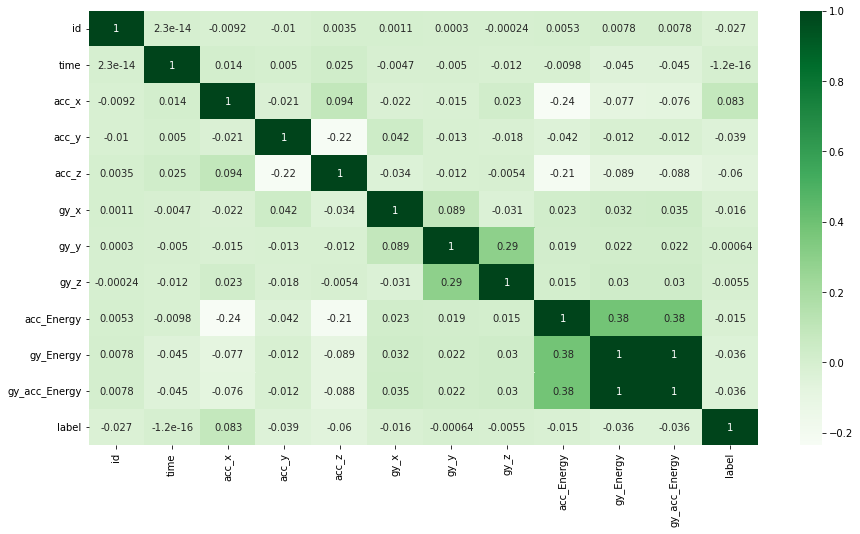

In [76]:
plt.figure(figsize=(15,8))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap= 'Greens')

In [58]:
y_group = train_labels.groupby(['label','label_desc']).id.count().reset_index().sort_values('id', ascending=False)
y_group.columns = ['label','label_desc', 'count']
y_group

,label,label_desc,count
26,26,Non-Exercise,1518
8,8,Device on Table,97
28,28,Plank,55
60,60,Wall Squat,48
18,18,Jump Rope,47
...,...,...,...
53,53,Triceps Kickback (knee on bench) (right arm),13
13,13,Dumbbell Row (knee on bench) (right arm),12
52,52,Triceps Kickback (knee on bench) (left arm),12
12,12,Dumbbell Row (knee on bench) (left arm),12


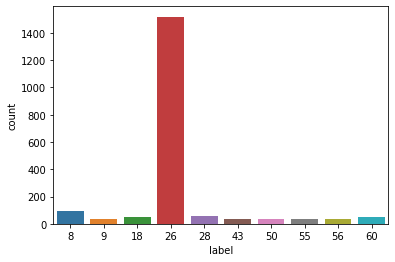

In [59]:
sns.barplot(data=y_group[:10], x='label', y='count')

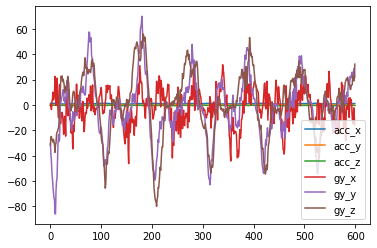

In [60]:
train[train['id']==0].iloc[:,2:].plot()

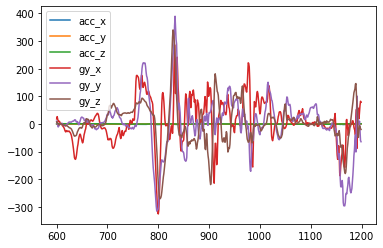

In [61]:
train[train['id']==1].iloc[:,2:].plot()

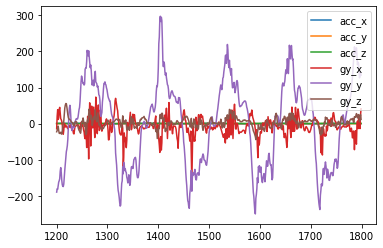

In [62]:
train[train['id']==2].iloc[:,2:].plot()

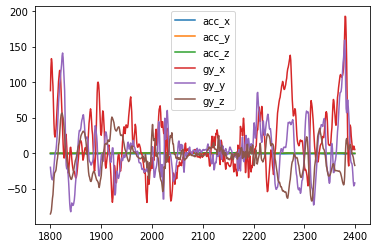

In [63]:
train[train['id']==3].iloc[:,2:].plot()

## Feature Engineering

In [84]:
train['acc_Energy']=(train['acc_x']**2+train['acc_y']**2+train['acc_z']**2)**(1/3)
test['acc_Energy']=(test['acc_x']**2+test['acc_y']**2+test['acc_z']**2)**(1/3)

train['gy_Energy']=(train['gy_x']**2+train['gy_y']**2+train['gy_z']**2)**(1/3)
test['gy_Energy']=(test['gy_x']**2+test['gy_y']**2+test['gy_z']**2)**(1/3)

train['gy_acc_Energy']=((train['gy_x']-train['acc_x'])**2+(train['gy_y']-train['acc_y'])**2+(train['gy_z']-train['acc_z'])**2)**(1/3)
test['gy_acc_Energy']=((test['gy_x']-test['acc_x'])**2+(test['gy_y']-test['acc_y'])**2+(test['gy_z']-test['acc_z'])**2)**(1/3)

In [85]:
train.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,acc_Energy,gy_Energy,gy_acc_Energy
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,1.146962,12.465436,12.427938
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,1.200703,12.913284,12.865692
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,1.217403,13.725729,13.692643
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,1.209981,15.374021,15.314907
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,1.211254,16.074363,16.017964


In [86]:
test.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,acc_Energy,gy_Energy,gy_acc_Energy
0,3125,0,-0.628100,-0.160155,0.151487,49.665357,88.435961,13.597668,0.762377,21.878437,21.938882
1,3125,1,-0.462548,0.012462,-0.053726,56.953059,96.185341,16.278458,0.600917,23.367908,23.399763
2,3125,2,-0.363481,-0.091789,-0.130004,29.557396,93.836453,13.329043,0.539978,21.440856,21.471510
3,3125,3,-0.351750,-0.239870,-0.193053,23.686172,88.608721,13.449771,0.602338,20.482783,20.533967
4,3125,4,-0.312934,-0.123762,-0.318621,20.410071,85.327707,13.884912,0.598853,19.908061,19.944125


## Standard Scaling

In [87]:
col=train.columns
train_s=train.copy()
test_s=test.copy()

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_s.iloc[:,2:] = scaler.fit_transform(train_s.iloc[:,2:])
train_sc = pd.DataFrame(data=train_s, columns=col)

test_s.iloc[:,2:] = scaler.transform(test_s.iloc[:,2:])
test_sc = pd.DataFrame(data=test_s, columns=col)

In [89]:
train_sc.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,acc_Energy,gy_Energy,gy_acc_Energy
0,0,0,2.307314,-0.029939,-0.432104,0.011776,-0.410859,-0.461007,0.495681,-0.272719,-0.276391
1,0,1,2.421086,-0.063321,-0.504058,0.026484,-0.528052,-0.365459,0.742974,-0.236152,-0.240632
2,0,2,2.444664,-0.056749,-0.654199,-0.037962,-0.596041,-0.366767,0.819822,-0.169815,-0.173080
3,0,3,2.428612,-0.116782,-0.573407,0.066099,-0.725311,-0.401232,0.785669,-0.035229,-0.040560
4,0,4,2.439475,-0.044220,-0.588886,0.091969,-0.784094,-0.408413,0.791528,0.021954,0.016872


In [90]:
test_sc.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,acc_Energy,gy_Energy,gy_acc_Energy
0,3125,0,-0.249727,0.002786,0.202699,0.837933,1.212439,0.179961,-1.274039,0.495865,0.500542
1,3125,1,-0.018931,0.296752,-0.231628,0.957733,1.318163,0.217914,-2.017015,0.617482,0.619879
2,3125,2,0.119178,0.119214,-0.393070,0.507385,1.286118,0.176158,-2.297435,0.460136,0.462363
3,3125,3,0.135533,-0.132967,-0.526513,0.410870,1.214796,0.177867,-2.010477,0.381908,0.385777
4,3125,4,0.189646,0.064763,-0.792275,0.357015,1.170034,0.184028,-2.026512,0.334981,0.337594


## X, y

In [104]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [98]:
X = tf.reshape(np.array(train_sc.iloc[:,2:]),[-1,600,9,1])
X.shape

TensorShape([3125, 600, 9, 1])

In [99]:
y = tf.keras.utils.to_categorical(train_labels['label'])
y.shape

(3125, 61)

In [ ]:
X

In [101]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

## Model

In [121]:
# model = Sequential()
# model.add(LSTM(32, input_shape=(600,9)))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(61, activation='softmax'))

# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# ^^ Base Code

In [124]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

model = Sequential()

nf = 4 ; ks = (30, 1) ; ps = (3, 1) #0.2 : 0.75
d_rate = 0.15

model.add(Conv2D(nf, ks, padding='same', activation='relu', input_shape=(600,9,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=ps))
model.add(Dropout(d_rate))

model.add(Conv2D(2*nf, ks, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=ps))
model.add(Dropout(d_rate))

model.add(Conv2D(4*nf, ks, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=ps))
model.add(Dropout(d_rate))

model.add(Conv2D(8*nf, ks, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=ps))
model.add(Dropout(d_rate))

model.add(Conv2D(16*nf, ks, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=ps))
model.add(Dropout(d_rate)) 

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(61, activation='softmax'))

In [130]:
model.compile(optimizer=tf.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [131]:
es = EarlyStopping(monitor='val_loss', patience=150, verbose=0, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=50, verbose=0, min_lr=0.001, mode='min') 


hist = model.fit(X, y, validation_data=(X, y),
                    callbacks=[es, reduce_lr],
                    epochs=100, batch_size=64
                )

Epoch 1/100
49/49 [==============================] - 51s 1s/step - loss: 1.0152 - accuracy: 0.7027 - val_loss: 0.6454 - val_accuracy: 0.7930 - lr: 0.0010
Epoch 2/100
49/49 [==============================] - 48s 996ms/step - loss: 0.9521 - accuracy: 0.7174 - val_loss: 0.5712 - val_accuracy: 0.8154 - lr: 0.0010
Epoch 3/100
49/49 [==============================] - 46s 940ms/step - loss: 0.9095 - accuracy: 0.7264 - val_loss: 0.5359 - val_accuracy: 0.8115 - lr: 0.0010
Epoch 4/100
49/49 [==============================] - 46s 940ms/step - loss: 0.8759 - accuracy: 0.7318 - val_loss: 0.5186 - val_accuracy: 0.8298 - lr: 0.0010
Epoch 5/100
49/49 [==============================] - 46s 937ms/step - loss: 0.8408 - accuracy: 0.7414 - val_loss: 0.5119 - val_accuracy: 0.8352 - lr: 0.0010
Epoch 6/100
49/49 [==============================] - 48s 980ms/step - loss: 0.7952 - accuracy: 0.7510 - val_loss: 0.4621 - val_accuracy: 0.8547 - lr: 0.0010
Epoch 7/100
49/49 [==============================] - 46s 941m

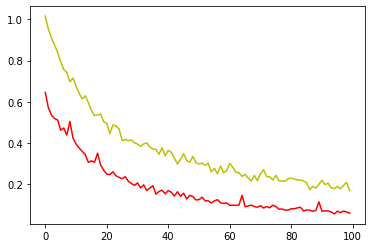

In [132]:
figs, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

In [133]:
X_test=tf.reshape(np.array(test_sc.iloc[:,2:]),[-1,600,9,1])
X_test.shape

TensorShape([782, 600, 9, 1])

In [134]:
y_pred = model.predict(X_test)

25/25 [==============================] - 4s 136ms/step


In [135]:
y_pred.shape

(782, 61)

In [136]:
y_pred

array([[6.31522495e-18, 8.70403384e-19, 1.03555707e-15, ...,
        9.78581250e-01, 2.64551863e-22, 2.17129613e-12],
       [3.08432386e-20, 2.01801119e-33, 2.25907285e-34, ...,
        0.00000000e+00, 0.00000000e+00, 1.23571653e-22],
       [1.32396056e-17, 2.78359948e-08, 3.44680556e-12, ...,
        1.49421840e-17, 4.59156105e-15, 3.89554185e-16],
       ...,
       [6.09338421e-18, 5.72478728e-28, 3.42245321e-31, ...,
        6.31785502e-38, 1.53018875e-32, 6.45248013e-21],
       [9.98568493e-20, 3.82598472e-15, 9.46793487e-35, ...,
        3.24842745e-19, 8.91676629e-18, 2.33499912e-29],
       [2.31326562e-32, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.92398263e-35]], dtype=float32)

In [137]:
submission.iloc[:,1:] = y_pred

In [138]:
submission

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3125,6.315225e-18,8.704034e-19,1.035557e-15,7.853562e-15,1.593354e-13,2.427815e-20,2.196091e-08,4.240634e-18,2.821557e-16,6.213551e-09,2.434001e-06,1.422820e-07,3.084235e-11,4.525293e-04,3.312994e-07,1.033935e-14,2.476640e-23,1.407057e-22,3.122567e-19,1.076477e-14,3.756310e-12,1.561549e-13,7.207786e-18,7.307010e-13,...,5.451747e-09,1.272341e-08,4.114631e-12,2.725161e-12,8.883912e-17,8.774073e-19,4.429503e-08,4.225273e-13,1.875880e-17,2.788817e-13,9.948333e-13,2.536254e-14,1.035232e-18,2.541888e-16,1.529711e-17,3.031283e-09,8.856556e-13,2.652220e-13,3.341302e-15,2.292522e-13,2.074832e-19,8.785331e-18,9.785812e-01,2.645519e-22,2.171296e-12
1,3126,3.084324e-20,2.018011e-33,2.259073e-34,1.576937e-26,7.587037e-27,2.726331e-29,0.000000e+00,1.945614e-36,2.808435e-29,8.154682e-27,0.000000e+00,9.310508e-38,0.000000e+00,0.000000e+00,0.000000e+00,7.902566e-24,2.695415e-34,1.109737e-36,2.291729e-32,0.000000e+00,0.000000e+00,1.907469e-33,3.860489e-26,1.162624e-25,...,2.034821e-29,0.000000e+00,9.748218e-37,0.000000e+00,1.172008e-36,7.902326e-31,5.272124e-38,0.000000e+00,0.000000e+00,0.000000e+00,6.031837e-35,3.893029e-31,1.611638e-19,3.239012e-18,1.058532e-18,0.000000e+00,0.000000e+00,0.000000e+00,1.584924e-24,8.282750e-35,0.000000e+00,1.084710e-18,0.000000e+00,0.000000e+00,1.235717e-22
2,3127,1.323961e-17,2.783599e-08,3.446806e-12,3.349239e-15,1.388465e-21,4.096019e-15,3.639930e-11,7.612637e-13,3.709939e-10,6.710392e-21,1.765844e-19,1.044576e-20,1.623843e-22,3.695311e-22,5.214688e-13,3.011864e-14,4.337524e-17,2.482175e-13,1.603857e-17,1.127641e-18,1.174246e-14,4.085397e-13,1.195905e-21,2.273439e-22,...,2.885120e-16,2.758791e-10,2.282933e-11,4.290191e-12,4.574918e-14,1.402501e-15,1.734867e-07,3.888721e-06,2.925442e-06,9.999929e-01,1.051308e-13,7.701410e-11,9.877208e-16,1.199089e-13,1.310204e-17,2.603429e-15,2.840475e-25,7.787703e-19,1.391836e-09,4.755519e-11,8.188929e-09,5.172616e-25,1.494218e-17,4.591561e-15,3.895542e-16
3,3128,1.956416e-18,5.765305e-29,1.883028e-30,5.794822e-24,5.628073e-24,1.933013e-24,0.000000e+00,1.301695e-31,2.397735e-27,3.283975e-26,0.000000e+00,3.937421e-36,0.000000e+00,0.000000e+00,0.000000e+00,2.173670e-22,1.160473e-28,2.660289e-31,1.481263e-29,0.000000e+00,6.119765e-37,6.181071e-29,1.847620e-24,4.141802e-23,...,1.570172e-26,0.000000e+00,2.682052e-33,0.000000e+00,8.712443e-31,1.305081e-24,1.376385e-33,7.883239e-38,0.000000e+00,0.000000e+00,2.947976e-31,5.853773e-29,4.998898e-17,8.094663e-16,8.577829e-16,7.642363e-37,0.000000e+00,0.000000e+00,8.827033e-21,7.935824e-32,4.189070e-32,2.164293e-17,0.000000e+00,6.597699e-33,1.160748e-20
4,3129,2.615205e-21,3.420018e-35,4.908501e-38,2.701358e-31,3.985436e-26,2.338376e-30,0.000000e+00,1.818430e-36,1.099694e-30,1.520731e-26,0.000000e+00,4.057249e-37,0.000000e+00,0.000000e+00,0.000000e+00,3.767224e-25,1.671463e-36,7.998590e-38,3.896531e-33,0.000000e+00,0.000000e+00,2.358320e-35,3.306895e-24,1.491654e-25,...,3.639932e-31,0.000000e+00,1.019347e-36,0.000000e+00,1.505664e-35,6.781370e-33,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.258391e-36,3.466338e-31,6.064649e-19,2.256965e-17,5.302305e-20,0.000000e+00,0.000000e+00,0.000000e+00,1.189301e-24,0.000000e+00,0.000000e+00,1.481526e-18,0.000000e+00,0.000000e+00,6.385159e-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,8.949717e-11,5.858989e-18,2.093219e-18,2.521589e-14,8.623705e-14,6.796605e-16,1.581838e-23,5.492138e-19,1.904432e-15,6.788790e-13,7.650443e-22,1.263900e-18,4.268878e-23,6.185101e-23,1.564012e-22,6.463028e-12,3.126809e-18,1.128517e-19,1.300603e-16,2.703835e-22,3.271430e-21,6.317874e-17,2.826840e-12,1.962282e-12,...,2.518617e-15,1.677379e-27,3.293019e-19,5.281963e-25,9.123721e-20,1.218639e-16,1.48

In [139]:
submission.to_csv(f'{base_path}/submission.csv', index=False)